<a href="https://colab.research.google.com/github/AngeClementAkazan/Neural-Network-With-Pytorch/blob/main/Create_a_neural_network_with_Pytorch_for_classification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [106]:
class Model(nn.Module):
  "Neural net with two hidden layers with h1 and h2 node, and input of 4 nodes and output of 3 nodes"
  def __init__(self,in_f=4,h1=9,h2=8,out_f=3):
    super(Model,self).__init__()
    self.in_f=in_f
    self.h1=h1
    self.h2=h2
    self.out_f=out_f
    self.main=nn.Sequential(
        nn.Linear(in_f,h1),
        nn.ReLU(),
        nn.Linear(h1,h2),
        nn.ReLU(),
        nn.Linear(h2,out_f))

  def forward(self,input):
    out=self.main(input)
    return out

In [107]:
#Random seed
torch.manual_seed(100)
#Model
model=Model()

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
#Loading Data
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df=pd.read_csv(url)

In [109]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [110]:
#Replacing value of the target column for classification
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)

In [111]:
#Train, test data extraction
X=df.drop('variety',axis=1).values
y=df['variety'].values

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [113]:
#Convert the data in float tensor
X_train=torch.FloatTensor(X_train)
y_train=torch.LongTensor(y_train) #LongTensor: Int62bits
X_test=torch.FloatTensor(X_test)
y_test=torch.LongTensor(y_test)

In [114]:
#Criterion to measure the error between prediction and ground truth
criterion=nn.CrossEntropyLoss()
#Optimizers
opt=torch.optim.Adam(model.parameters(),lr=0.002,betas=(0.5,0.999))
epch=200
ls=[]
for i in range(epch):
  #Get predicted result
  y_pred=model.forward(X_train)
  #Measure the loss
  loss=criterion(y_pred,y_train)
  #Keep track of the loss for plot
  ls.append(loss.detach().numpy())

  #Print the loss value after every 10 epochs
  if i%20==0: print(f'Loss:{loss} at epoch:{i} over {epch}')
  #The Backpropagation process to finetune weights
  opt.zero_grad()
  loss.backward()
  opt.step()

Loss:1.1899101734161377 at epoch:0 over 200
Loss:1.0145095586776733 at epoch:20 over 200
Loss:0.856200098991394 at epoch:40 over 200
Loss:0.6705280542373657 at epoch:60 over 200
Loss:0.5219783782958984 at epoch:80 over 200
Loss:0.41926804184913635 at epoch:100 over 200
Loss:0.3379591107368469 at epoch:120 over 200
Loss:0.2700462341308594 at epoch:140 over 200
Loss:0.2162068486213684 at epoch:160 over 200
Loss:0.17624086141586304 at epoch:180 over 200


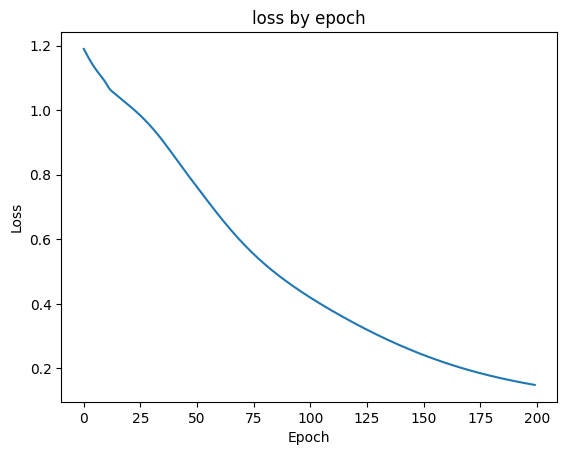

In [115]:
#Plot the loss by epoch
plt.plot(range(epch),ls)
plt.title("loss by epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [116]:
#Evaluate Model on Test Data Set
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss=criterion(y_eval,y_test)

loss

tensor(0.1113)

In [118]:
#Analysis of results
correct=0
with torch.no_grad():
  for i, dt in enumerate(X_test):
    y_val=model.forward(dt)
    #print the classification result
    print(f'observation:{i},  predicted value:{y_val.argmax().item()}, \t real value:{y_test[i]}')
    if y_val.argmax().item()==y_test[i]: correct+=1
  print(f'We got {correct} correct values out of 30')

observation:0,  predicted value:2, 	 real value:2
observation:1,  predicted value:0, 	 real value:0
observation:2,  predicted value:2, 	 real value:2
observation:3,  predicted value:0, 	 real value:0
observation:4,  predicted value:2, 	 real value:2
observation:5,  predicted value:2, 	 real value:2
observation:6,  predicted value:0, 	 real value:0
observation:7,  predicted value:0, 	 real value:0
observation:8,  predicted value:2, 	 real value:2
observation:9,  predicted value:0, 	 real value:0
observation:10,  predicted value:0, 	 real value:0
observation:11,  predicted value:2, 	 real value:2
observation:12,  predicted value:0, 	 real value:0
observation:13,  predicted value:0, 	 real value:0
observation:14,  predicted value:2, 	 real value:2
observation:15,  predicted value:1, 	 real value:1
observation:16,  predicted value:1, 	 real value:1
observation:17,  predicted value:1, 	 real value:1
observation:18,  predicted value:2, 	 real value:2
observation:19,  predicted value:2, 	 rea